# Code for obtaining blade lengths of the turbine

In [12]:
#Senior Design Data Processing Example
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [13]:
path = (input("Paste the copied path here: "))

Paste the copied path here: /content/snapshot_MULTI_SENSOR_2023-04-30_14-23-41.477.csv


# Data preprocessing

In [14]:
dataset = pd.read_csv(path, dtype={'#1_Distance1 (in)': int, '#2_Distance1 (in)': int, '#3_Distance (in)': int })

<ipython-input-14-c211e8c8cd84>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(path, dtype={'#1_Distance1 (in)': int, '#2_Distance1 (in)': int, '#3_Distance (in)': int })


In [20]:
newData = dataset.drop(labels=range(0, 10), axis=0)

In [21]:
newData = newData[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']]

In [23]:
newData['Unnamed: 2']=newData['Unnamed: 2'].astype(float)
newData['Unnamed: 3']=newData['Unnamed: 3'].astype(float)
newData['Unnamed: 4']=newData['Unnamed: 4'].astype(float)

In [25]:
#Take datapoints from csv file into data_set_array
data_set_array = newData['Unnamed: 2'] #Blade Distance
data_set_array2 = newData['Unnamed: 3'] #Sensor Distance
data_set_array3 = newData['Unnamed: 4'] #Sweeping Distance
m = len(data_set_array);
n = m-1;

# Plotting the blade tip data acquisition

In [29]:
#Data processing to take the points at the tip of the blade (minimum values)

sample_plot = []

In [31]:


#Compare previous, present, and future values and append the minimum value to the new array
for (iteration) in range(m):
    # print(current_low)
    if iteration == 10:
        pass
        # print("We are starting to process the data")
    elif iteration < 10:
        pass
        # print("We're getting ready")
    elif iteration == n:
        pass
    else:
        sample_plot.append(data_set_array[iteration])

This is the end of the array 26483


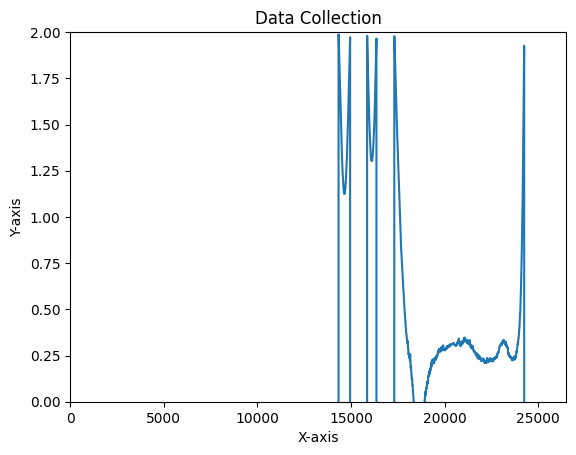

In [32]:
plt.plot(sample_plot)

plt.title('Data Collection')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.xlim(0, m)
plt.ylim(0, 2)

plt.show()

# Processing the data to find the blade tips

In [37]:
threshold_start = 1.3
threshold_end = 0
current_low = 10000

tip_detected = 0 #BOOLEAN 
skips = 0 #SKIP ITERATION
iteration_holder = 0
data_blade_tips = []
data_sensor_distance = []

In [38]:


#Compare previous, present, and future values and append the minimum value to the new array
for iteration in range(m):
    if(skips > 0):
        skips = skips - 1
    else:
        if iteration == 10:
          pass
        elif iteration < 10:
          pass
        elif iteration == n:
          pass
        elif ((data_set_array[iteration] < threshold_start) and (data_set_array[iteration+1] < threshold_start) and (data_set_array[iteration] > 0)):
            iteration_holder = iteration
            while ((data_set_array[iteration_holder] < threshold_start)):
                if (data_set_array[iteration_holder] < current_low):
                    current_low = data_set_array[iteration_holder]
                iteration_holder = iteration_holder + 1
            skips = iteration_holder - iteration
            if current_low < 0:
                pass
            else:
                data_blade_tips.append(current_low)
                data_sensor_distance.append(data_set_array2[iteration])
        else:
            current_low = 10000

# Calculating blade lengths

In [ ]:
for iteration in range(len(data_blade_tips)):
  data_blade_tips[iteration] = data_blade_tips[iteration] + data_sensor_distance[iteration]

In [48]:
blindspot = 1.1811
A = float(input("What is the journal's radius: "))
A = A + blindspot
D = float(input("What's the distance from the journal sensor to the blade sensor of the frame: "))
D = D + blindspot

totalDistance = A + D

data_blade_length = []

x = len(data_blade_tips)
for iteration in range(x):
  blade_length = totalDistance - (data_blade_tips[iteration] + blindspot)
  data_blade_length.append(blade_length)

What is the journal's radius: 10
What's the distance from the journal sensor to the blade sensor of the frame: 20


# Creating Excel Sheet

In [ ]:
#Writing the array to an excel sheet
df = pd.DataFrame(data_blade_length)
df.to_excel(r"Data.xlsx")